## 파이썬으로 확인하는 다중 선형 회귀

#### 1. 환경 준비

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### 2. 데이터 준비

In [2]:
#공부 시간 x1과 과외 시간 x2, 그성적 y의 넘파이 배열을 만듭니다. 
x1 = np.array([2, 4, 6, 8])
x2 = np.array([0, 4, 2, 3])
y = np.array([81, 93, 91, 97]) 

#### 3. 데이터 분포 확인

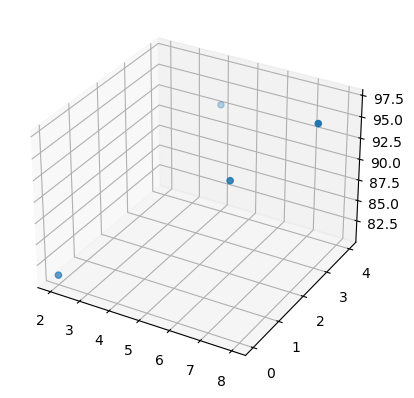

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x1, x2, y)
plt.show()

#### 4. 실행을 위한 별수 설정

In [4]:
# 기울기 a와 절편 b의 값을 초기화
a1 = 0
a2 = 0
b = 0

#학습률
lr = 0.01 

#몇 번 반복될지
epochs = 2001 

#### 5. 경사 하강법

In [5]:
# x 값이 총 몇 개인지 셉니다. x1과 x2의 수가 같으므로 x1만 세겠습니다. 
n=len(x1)

#경사 하강법을 시작합니다.
for i in range(epochs):                  # epoch 수 만큼 반복
    
    y_pred = a1 * x1 + a2 * x2 + b       #예측 값을 구하는 식을 세웁니다
    error = y - y_pred                   #실제 값과 비교한 오차를 error로 놓습니다.
    
    a1_diff = (2/n) * sum(-x1 * (error)) # 오차함수를 a1로 편미분한 값입니다. 
    a2_diff = (2/n) * sum(-x2 * (error)) # 오차함수를 a2로 편미분한 값입니다. 
    b_diff = (2/n) * sum(-(error))       # 오차함수를 b로 편미분한 값입니다. 
    
    a1 = a1 - lr * a1_diff  # 학습률을 곱해 기존의 a1 값을 업데이트합니다.
    a2 = a2 - lr * a2_diff  # 학습률을 곱해 기존의 a2 값을 업데이트합니다.
    b = b - lr * b_diff     # 학습률을 곱해 기존의 b 값을 업데이트합니다.
    
    if i % 100 == 0:        # 100번 반복될 때마다 현재의 a1, a2, b 값을 출력합니다.
        print("epoch=%.f, 기울기1=%.04f, 기울기2=%.04f, 절편=%.04f" % (i, a1, a2, b))

epoch=0, 기울기1=9.2800, 기울기2=4.2250, 절편=1.8100
epoch=100, 기울기1=9.5110, 기울기2=5.0270, 절편=22.9205
epoch=200, 기울기1=7.3238, 기울기2=4.2950, 절편=37.8751
epoch=300, 기울기1=5.7381, 기울기2=3.7489, 절편=48.7589
epoch=400, 기울기1=4.5844, 기울기2=3.3507, 절편=56.6800
epoch=500, 기울기1=3.7447, 기울기2=3.0608, 절편=62.4448
epoch=600, 기울기1=3.1337, 기울기2=2.8498, 절편=66.6404
epoch=700, 기울기1=2.6890, 기울기2=2.6962, 절편=69.6938
epoch=800, 기울기1=2.3653, 기울기2=2.5845, 절편=71.9160
epoch=900, 기울기1=2.1297, 기울기2=2.5032, 절편=73.5333
epoch=1000, 기울기1=1.9583, 기울기2=2.4440, 절편=74.7103
epoch=1100, 기울기1=1.8336, 기울기2=2.4009, 절편=75.5670
epoch=1200, 기울기1=1.7428, 기울기2=2.3695, 절편=76.1904
epoch=1300, 기울기1=1.6767, 기울기2=2.3467, 절편=76.6441
epoch=1400, 기울기1=1.6286, 기울기2=2.3301, 절편=76.9743
epoch=1500, 기울기1=1.5936, 기울기2=2.3180, 절편=77.2146
epoch=1600, 기울기1=1.5681, 기울기2=2.3092, 절편=77.3895
epoch=1700, 기울기1=1.5496, 기울기2=2.3028, 절편=77.5168
epoch=1800, 기울기1=1.5361, 기울기2=2.2982, 절편=77.6095
epoch=1900, 기울기1=1.5263, 기울기2=2.2948, 절편=77.6769
epoch=2000, 기울기1=1.5191, 기울기2=2.2

In [6]:
#실제 점수와 예측 된 점수를 출력합니다.
print("실제 점수:", y)
print("예측 점수:", y_pred)

실제 점수: [81 93 91 97]
예측 점수: [80.76387645 92.97153922 91.42520875 96.7558749 ]


## Tenserflow로 실행하는 다중 선형 회귀 모델

#### 1. 환경 준비

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#### 2. 데이터 준비

In [8]:
x = np.array([[2, 0], [4, 4], [6, 2], [8, 3]])   # [공부시간, 과외]
y = np.array([81, 93, 91, 97])                   # 성적

#### 3. 모델 실행

In [9]:
model = Sequential()

#입력 변수가 2개(학습 시간, 과외 시간)이므로 input_dim에 2를 입력합니다. 
model.add(Dense(1, input_dim=2, activation='linear'))
model.compile(optimizer='sgd' ,loss='mse')

model.fit(x, y, epochs=2000)

Epoch 1/2000
1/1 [==============================] - 0s 308ms/step - loss: 8724.9229
Epoch 2/2000
1/1 [==============================] - 0s 0s/step - loss: 1473.3617
Epoch 3/2000
1/1 [==============================] - 0s 6ms/step - loss: 957.8201
Epoch 4/2000
1/1 [==============================] - 0s 15ms/step - loss: 916.0616
Epoch 5/2000
1/1 [==============================] - 0s 10ms/step - loss: 907.6639
Epoch 6/2000
1/1 [==============================] - 0s 2ms/step - loss: 901.6515
Epoch 7/2000
1/1 [==============================] - 0s 12ms/step - loss: 895.8455
Epoch 8/2000
1/1 [==============================] - 0s 13ms/step - loss: 890.0921
Epoch 9/2000
1/1 [==============================] - 0s 7ms/step - loss: 884.3801
Epoch 10/2000
1/1 [==============================] - 0s 20ms/step - loss: 878.7085
Epoch 11/2000
1/1 [==============================] - 0s 8ms/step - loss: 873.0763
Epoch 12/2000
1/1 [==============================] - 0s 15ms/step - loss: 867.4836
Epoch 13/2000
1/

1/1 [==============================] - 0s 10ms/step - loss: 265.6771
Epoch 199/2000
1/1 [==============================] - 0s 11ms/step - loss: 263.9946
Epoch 200/2000
1/1 [==============================] - 0s 14ms/step - loss: 262.3227
Epoch 201/2000
1/1 [==============================] - 0s 8ms/step - loss: 260.6612
Epoch 202/2000
1/1 [==============================] - 0s 10ms/step - loss: 259.0104
Epoch 203/2000
1/1 [==============================] - 0s 8ms/step - loss: 257.3700
Epoch 204/2000
1/1 [==============================] - 0s 9ms/step - loss: 255.7401
Epoch 205/2000
1/1 [==============================] - 0s 6ms/step - loss: 254.1204
Epoch 206/2000
1/1 [==============================] - 0s 9ms/step - loss: 252.5110
Epoch 207/2000
1/1 [==============================] - 0s 8ms/step - loss: 250.9118
Epoch 208/2000
1/1 [==============================] - 0s 6ms/step - loss: 249.3228
Epoch 209/2000
1/1 [==============================] - 0s 4ms/step - loss: 247.7437
Epoch 210/2000


1/1 [==============================] - 0s 9ms/step - loss: 76.0201
Epoch 396/2000
1/1 [==============================] - 0s 7ms/step - loss: 75.5390
Epoch 397/2000
1/1 [==============================] - 0s 7ms/step - loss: 75.0610
Epoch 398/2000
1/1 [==============================] - 0s 12ms/step - loss: 74.5858
Epoch 399/2000
1/1 [==============================] - 0s 2ms/step - loss: 74.1138
Epoch 400/2000
1/1 [==============================] - 0s 15ms/step - loss: 73.6448
Epoch 401/2000
1/1 [==============================] - 0s 13ms/step - loss: 73.1787
Epoch 402/2000
1/1 [==============================] - 0s 0s/step - loss: 72.7155
Epoch 403/2000
1/1 [==============================] - 0s 17ms/step - loss: 72.2553
Epoch 404/2000
1/1 [==============================] - 0s 0s/step - loss: 71.7981
Epoch 405/2000
1/1 [==============================] - 0s 6ms/step - loss: 71.3437
Epoch 406/2000
1/1 [==============================] - 0s 12ms/step - loss: 70.8922
Epoch 407/2000
1/1 [========

1/1 [==============================] - 0s 0s/step - loss: 21.5142
Epoch 595/2000
1/1 [==============================] - 0s 15ms/step - loss: 21.3784
Epoch 596/2000
1/1 [==============================] - 0s 0s/step - loss: 21.2434
Epoch 597/2000
1/1 [==============================] - 0s 17ms/step - loss: 21.1093
Epoch 598/2000
1/1 [==============================] - 0s 0s/step - loss: 20.9761
Epoch 599/2000
1/1 [==============================] - 0s 0s/step - loss: 20.8436
Epoch 600/2000
1/1 [==============================] - 0s 17ms/step - loss: 20.7120
Epoch 601/2000
1/1 [==============================] - 0s 0s/step - loss: 20.5813
Epoch 602/2000
1/1 [==============================] - 0s 17ms/step - loss: 20.4513
Epoch 603/2000
1/1 [==============================] - 0s 0s/step - loss: 20.3223
Epoch 604/2000
1/1 [==============================] - 0s 16ms/step - loss: 20.1939
Epoch 605/2000
1/1 [==============================] - 0s 17ms/step - loss: 20.0665
Epoch 606/2000
1/1 [===========

1/1 [==============================] - 0s 13ms/step - loss: 11.4290
Epoch 695/2000
1/1 [==============================] - 0s 3ms/step - loss: 11.3570
Epoch 696/2000
1/1 [==============================] - 0s 7ms/step - loss: 11.2855
Epoch 697/2000
1/1 [==============================] - 0s 11ms/step - loss: 11.2145
Epoch 698/2000
1/1 [==============================] - 0s 0s/step - loss: 11.1439
Epoch 699/2000
1/1 [==============================] - 0s 15ms/step - loss: 11.0737
Epoch 700/2000
1/1 [==============================] - 0s 0s/step - loss: 11.0040
Epoch 701/2000
1/1 [==============================] - 0s 16ms/step - loss: 10.9348
Epoch 702/2000
1/1 [==============================] - 0s 0s/step - loss: 10.8659
Epoch 703/2000
1/1 [==============================] - 0s 17ms/step - loss: 10.7976
Epoch 704/2000
1/1 [==============================] - 0s 0s/step - loss: 10.7296
Epoch 705/2000
1/1 [==============================] - 0s 6ms/step - loss: 10.6621
Epoch 706/2000
1/1 [==========

1/1 [==============================] - 0s 0s/step - loss: 3.2375
Epoch 896/2000
1/1 [==============================] - 0s 6ms/step - loss: 3.2174
Epoch 897/2000
1/1 [==============================] - 0s 10ms/step - loss: 3.1975
Epoch 898/2000
1/1 [==============================] - 0s 0s/step - loss: 3.1777
Epoch 899/2000
1/1 [==============================] - 0s 15ms/step - loss: 3.1580
Epoch 900/2000
1/1 [==============================] - 0s 0s/step - loss: 3.1385
Epoch 901/2000
1/1 [==============================] - 0s 17ms/step - loss: 3.1191
Epoch 902/2000
1/1 [==============================] - 0s 0s/step - loss: 3.0998
Epoch 903/2000
1/1 [==============================] - 0s 7ms/step - loss: 3.0806
Epoch 904/2000
1/1 [==============================] - 0s 10ms/step - loss: 3.0615
Epoch 905/2000
1/1 [==============================] - 0s 2ms/step - loss: 3.0426
Epoch 906/2000
1/1 [==============================] - 0s 18ms/step - loss: 3.0237
Epoch 907/2000
1/1 [======================

1/1 [==============================] - 0s 9ms/step - loss: 0.9653
Epoch 1095/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.9597
Epoch 1096/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.9540
Epoch 1097/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.9484
Epoch 1098/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.9429
Epoch 1099/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.9374
Epoch 1100/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.9319
Epoch 1101/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.9264
Epoch 1102/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.9210
Epoch 1103/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.9156
Epoch 1104/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.9103
Epoch 1105/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.9050
Epoch 1106/2000
1/1 [====

1/1 [==============================] - 0s 8ms/step - loss: 0.3254
Epoch 1293/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.3238
Epoch 1294/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.3222
Epoch 1295/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.3206
Epoch 1296/2000
1/1 [==============================] - 0s 13ms/step - loss: 0.3191
Epoch 1297/2000
1/1 [==============================] - 0s 0s/step - loss: 0.3175
Epoch 1298/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.3159
Epoch 1299/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.3144
Epoch 1300/2000
1/1 [==============================] - 0s 15ms/step - loss: 0.3128
Epoch 1301/2000
1/1 [==============================] - 0s 13ms/step - loss: 0.3113
Epoch 1302/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.3098
Epoch 1303/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.3083
Epoch 1304/2000
1/1 [====

1/1 [==============================] - 0s 16ms/step - loss: 0.1436
Epoch 1491/2000
1/1 [==============================] - 0s 0s/step - loss: 0.1431
Epoch 1492/2000
1/1 [==============================] - 0s 595us/step - loss: 0.1427
Epoch 1493/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.1422
Epoch 1494/2000
1/1 [==============================] - 0s 0s/step - loss: 0.1418
Epoch 1495/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.1413
Epoch 1496/2000
1/1 [==============================] - 0s 0s/step - loss: 0.1409
Epoch 1497/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.1405
Epoch 1498/2000
1/1 [==============================] - 0s 0s/step - loss: 0.1400
Epoch 1499/2000
1/1 [==============================] - 0s 0s/step - loss: 0.1396
Epoch 1500/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.1392
Epoch 1501/2000
1/1 [==============================] - 0s 0s/step - loss: 0.1387
Epoch 1502/2000
1/1 [==========

1/1 [==============================] - 0s 9ms/step - loss: 0.0919
Epoch 1689/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.0918
Epoch 1690/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0917
Epoch 1691/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0915
Epoch 1692/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0914
Epoch 1693/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0913
Epoch 1694/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.0912
Epoch 1695/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0910
Epoch 1696/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0909
Epoch 1697/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0908
Epoch 1698/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0907
Epoch 1699/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0905
Epoch 1700/2000
1/1 [=========

1/1 [==============================] - 0s 17ms/step - loss: 0.0772
Epoch 1888/2000
1/1 [==============================] - 0s 0s/step - loss: 0.0772
Epoch 1889/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0771
Epoch 1890/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0771
Epoch 1891/2000
1/1 [==============================] - 0s 0s/step - loss: 0.0771
Epoch 1892/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0770
Epoch 1893/2000
1/1 [==============================] - 0s 0s/step - loss: 0.0770
Epoch 1894/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0770
Epoch 1895/2000
1/1 [==============================] - 0s 0s/step - loss: 0.0769
Epoch 1896/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0769
Epoch 1897/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0769
Epoch 1898/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0768
Epoch 1899/2000
1/1 [==========

#### 4. 모델 테스트

In [10]:
hour = 7
private_class = 4
prediction = model.predict([[hour, private_class]])

print("%.f시간을 공부하고 %.f시간의 과외를 받을 경우, 예상 점수는 %.02f점입니다" % (hour, private_class, prediction))

1/1 [==============================] - 0s 117ms/step
7시간을 공부하고 4시간의 과외를 받을 경우, 예상 점수는 97.53점입니다
